<a href="https://colab.research.google.com/github/RahulMimani-2024/Technological_Intervention_In_Tourism_Industry/blob/main/LSTM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LSTM for foreign tourist arrival problem with regression framing
import numpy 
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from matplotlib.pyplot import figure
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Flatten
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=12):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/monthly_tourist_arrivals_india_2002-2018.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
print(dataset)

[[0.12240492]
 [0.11177646]
 [0.07099019]
 [0.01792441]
 [0.        ]
 [0.03211322]
 [0.07734163]
 [0.05850776]
 [0.0459626 ]
 [0.10981826]
 [0.13750227]
 [0.16396321]
 [0.18063413]
 [0.17542456]
 [0.13990228]
 [0.07598113]
 [0.04057874]
 [0.07527828]
 [0.12078248]
 [0.10311449]
 [0.07864586]
 [0.15305711]
 [0.22480915]
 [0.25459158]
 [0.2254908 ]
 [0.2106102 ]
 [0.19423814]
 [0.0986087 ]
 [0.07737391]
 [0.09727496]
 [0.15344726]
 [0.12207378]
 [0.10669604]
 [0.19023784]
 [0.26041174]
 [0.3116715 ]
 [0.29329604]
 [0.27448064]
 [0.23013218]
 [0.1546814 ]
 [0.10468896]
 [0.12623738]
 [0.18062212]
 [0.15023465]
 [0.14424296]
 [0.23049189]
 [0.27754563]
 [0.36900598]
 [0.36352712]
 [0.33222282]
 [0.30529147]
 [0.192814  ]
 [0.12498941]
 [0.15574767]
 [0.23830159]
 [0.20009704]
 [0.14793335]
 [0.2795297 ]
 [0.36057276]
 [0.39997643]
 [0.3415286 ]
 [0.43349993]
 [0.311998  ]
 [0.20254593]
 [0.15021066]
 [0.18450253]
 [0.26787925]
 [0.22305574]
 [0.18464456]
 [0.28455567]
 [0.35988557]
 [0.36

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
print(trainX)

[[[0.12240492 0.11177646 0.07099019 ... 0.10981826 0.13750227 0.16396321]]

 [[0.11177646 0.07099019 0.01792441 ... 0.13750227 0.16396321 0.18063413]]

 [[0.07099019 0.01792441 0.         ... 0.16396321 0.18063413 0.17542456]]

 ...

 [[0.5338796  0.5045925  0.45936042 ... 0.42114204 0.54642564 0.62727875]]

 [[0.5045925  0.45936042 0.28507864 ... 0.54642564 0.62727875 0.56843615]]

 [[0.45936042 0.28507864 0.25452328 ... 0.62727875 0.56843615 0.5664918 ]]]


In [9]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(4, input_shape=(1, look_back)))
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Flatten())
model.add(Dense(12))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
es = EarlyStopping(monitor="val_loss",min_delta=0.0001, patience=11, verbose=1, mode='min', baseline=None,restore_best_weights=True) 
#model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
history = model.fit(trainX, trainY, epochs=200, batch_size=12,validation_data=(testX, testY), verbose=1,callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12)                1200      
                                                                 
 flatten (Flatten)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
11/11 [==============================] - 3s 65ms/step - loss: 0.1208 - val_loss: 0.3814
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0592 - val_

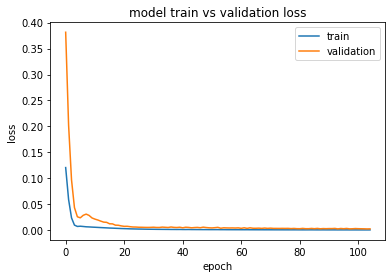

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [12]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [13]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, numpy.ndarray), 
                isinstance(predicted, numpy.ndarray)]):
        actual, predicted = numpy.array(actual),
        numpy.array(predicted)
  
    return round(
        numpy.mean(
            numpy.abs(predicted - actual) / 
            ((numpy.abs(predicted) + numpy.abs(actual))/2)
        )*100, 2
    )
  
  # to calculate mape
def MAPE(Y_actual,Y_Predicted):
    mape = numpy.mean(numpy.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
 

In [14]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
train_MAPE= MAPE(trainY[0],trainPredict[:,0])
print("Train Score: %.2f MAPE" % (train_MAPE))
test_MAPE= MAPE(testY[0],testPredict[:,0])
print("Test Score: %.2f MAPE" % (test_MAPE))
train_MAE=mean_absolute_error(trainY[0],trainPredict[:,0])
print("Train Score: %.2f MAE" % (train_MAE))
test_MAE=mean_absolute_error(testY[0],testPredict[:,0])
print("Train Score: %.2f MAE" % (test_MAE))
train_SMAPE=calculate_smape(trainY[0],trainPredict[:,0])
print("Train Score: %.2f SMAPE" % (train_SMAPE))
test_SMAPE=calculate_smape(testY[0],testPredict[:,0])
print("Test Score: %.2f SMAPE" % (test_SMAPE))

Train Score: 29434.83 RMSE
Test Score: 56001.54 RMSE
Train Score: 5.43 MAPE
Test Score: 5.48 MAPE
Train Score: 23265.92 MAE
Train Score: 44557.69 MAE
Train Score: 5.45 SMAPE
Test Score: 5.39 SMAPE


In [15]:
print(testY[0])

[ 509868.98862854  512341.00839719  628323.02692429  599477.99278008
  542600.01923816  683286.01552806  815947.02684985  912723.04016387
  844532.99456303  848782.03298641  809107.00101014  592004.03286994
  527465.99033297  546972.03182424  733834.01844107  652110.99903485
  608177.04159006  741770.02000296  878279.99983681 1021375.01021557
  983413.0218961   956336.99337657  904888.04155326  717899.00963751
  630438.0145075   669989.03838172  788377.03380082  724067.03951407
  722566.98736554  866976.00542914 1004826.03529548 1176232.95483567
 1066000.02688047 1052999.98419425 1026000.01483894  749477.00399649
  606042.99074988  681279.00998681  806255.00852648  784814.01414316
  719120.99671926  881763.01843645 1012128.03816572 1191147.0131419
 1103380.03658238 1087694.01330108  972866.00034277  771353.02836576
  610589.99757274  721015.04438536  806495.01170055  798586.99112261
  750514.04517512  944232.98838868 1091945.95967892]


In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [17]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

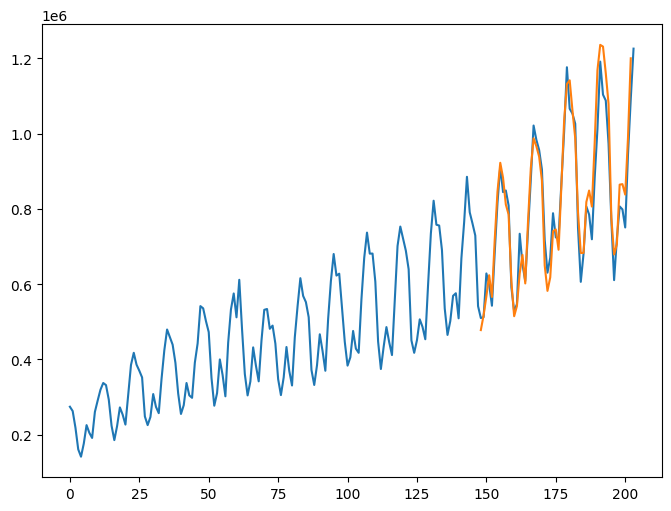

In [18]:
# plot baseline and predictions
figure(figsize=(8, 6), dpi=100)
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()